In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("spotify_main_raw_data.csv")

In [3]:
df.head()

Unnamed: 0                artist                          track  \
0           0     Bill Charlap Trio                      Day Dream   
1           1             Hara Noda  The Beauty of Everyday Things   
2           2           Jaden Berry                      Bewitched   
3           3       Wildflower Trio                       The Wind   
4           4  Courtney Salas Group            Constantly Changing   

   danceability  energy  key  loudness  mode  speechiness  acousticness  ...  \
0         0.432  0.0951    1   -23.511     1       0.0388         0.909  ...   
1         0.643  0.2800   10   -13.774     1       0.0332         0.965  ...   
2         0.322  0.1520    8   -16.765     1       0.0388         0.958  ...   
3         0.609  0.1620    3   -17.650     1       0.0375         0.917  ...   
4         0.509  0.1540    1   -18.927     1       0.0410         0.978  ...   

   valence    tempo            type                      id  \
0   0.0930  100.265  audio_features  5Smmg9SpxnawbuYPKSNcmx   
1   0.0865  108.046  audio_features  3jiTehDiPwfIxr9MHfPUvb   
2   0.2030  177.730  audio_features  7va480wmDj33F0PRpINgkD   
3   0.1230  106.051  audio_features  3ssyhOkzW2tfNCiR7qihx4   
4   0.2410  121.049  audio_features  51mO5KysnUohGZS49sH3OM   

                                    uri  \
0  spotify:track:5Smmg9SpxnawbuYPKSNcmx   
1  spotify:track:3jiTehDiPwfIxr9MHfPUvb   
2  spotify:track:7va480wmDj33F0PRpINgkD   
3  spotify:track:3ssyhOkzW2tfNCiR7qihx4   
4  spotify:track:51mO5KysnUohGZS49sH3OM   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/5Smmg9Spxnaw...   
1  https://api.spotify.com/v1/tracks/3jiTehDiPwfI...   
2  https://api.spotify.com/v1/tracks/7va480wmDj33...   
3  https://api.spotify.com/v1/tracks/3ssyhOkzW2tf...   
4  https://api.spotify.com/v1/tracks/51mO5KysnUoh...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/5Smm...      373840   
1  https://api.spotify.com/v1/audio-analysis/3jiT...      203097   
2  https://api.spotify.com/v1/audio-analysis/7va4...      207206   
3  https://api.spotify.com/v1/audio-analysis/3ssy...      237679   
4  https://api.spotify.com/v1/audio-analysis/51mO...      197273   

  time_signature  playlist  
0              4      Jazz  
1              4      Jazz  
2              3      Jazz  
3              4      Jazz  
4              4      Jazz  

[5 rows x 22 columns]

In [4]:
df.describe()

Unnamed: 0  danceability       energy          key     loudness  \
count  1082.000000   1082.000000  1082.000000  1082.000000  1082.000000   
mean     50.378928      0.641338     0.518193     5.243993   -10.334993   
std      28.759500      0.150686     0.263620     3.482158     5.599488   
min       0.000000      0.148000     0.006410     0.000000   -34.242000   
25%      26.000000      0.527000     0.275000     2.000000   -13.857250   
50%      51.000000      0.670000     0.582000     5.000000    -8.408500   
75%      75.000000      0.753000     0.730000     8.000000    -6.195500   
max      99.000000      0.955000     0.969000    11.000000    -1.538000   

              mode  speechiness  acousticness  instrumentalness     liveness  \
count  1082.000000  1082.000000   1082.000000       1082.000000  1082.000000   
mean      0.524954     0.080402      0.399916          0.247689     0.159471   
std       0.499608     0.077864      0.370608          0.362510     0.119113   
min       0.000000     0.023900      0.000060          0.000000     0.023700   
25%       0.000000     0.037000      0.050450          0.000001     0.096200   
50%       1.000000     0.046200      0.264500          0.001065     0.115000   
75%       1.000000     0.084825      0.848750          0.593250     0.175000   
max       1.000000     0.540000      0.990000          0.968000     0.981000   

          valence        tempo    duration_ms  time_signature  
count  1082.00000  1082.000000    1082.000000     1082.000000  
mean      0.41872   115.067943  219512.035120        3.940850  
std       0.25768    24.276570   63148.381115        0.313458  
min       0.03210    48.163000  105205.000000        1.000000  
25%       0.18625    98.866000  177607.250000        4.000000  
50%       0.36750   116.382500  210035.000000        4.000000  
75%       0.62200   124.036250  246293.000000        4.000000  
max       0.97000   205.006000  591373.000000        5.000000

In [5]:
df_cluster = df.select_dtypes('number')

In [6]:
df_cluster.head()

Unnamed: 0  danceability  energy  key  loudness  mode  speechiness  \
0           0         0.432  0.0951    1   -23.511     1       0.0388   
1           1         0.643  0.2800   10   -13.774     1       0.0332   
2           2         0.322  0.1520    8   -16.765     1       0.0388   
3           3         0.609  0.1620    3   -17.650     1       0.0375   
4           4         0.509  0.1540    1   -18.927     1       0.0410   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0         0.909             0.890     0.117   0.0930  100.265       373840   
1         0.965             0.867     0.107   0.0865  108.046       203097   
2         0.958             0.899     0.127   0.2030  177.730       207206   
3         0.917             0.791     0.112   0.1230  106.051       237679   
4         0.978             0.936     0.115   0.2410  121.049       197273   

   time_signature  
0               4  
1               4  
2               3  
3               4  
4               4

In [7]:
df_cluster = df_cluster.iloc[:,1:]

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()
df_cluster_sc = sc.fit_transform(df_cluster)

In [10]:
df_cluster_sc

array([[-1.38987786, -1.60567886, -1.21934581, ..., -0.61004451,
         2.44502436,  0.1887881 ],
       [ 0.01103292, -0.90396499,  1.3664533 , ..., -0.28938149,
        -0.26006408,  0.1887881 ],
       [-2.1202105 , -1.38973771,  0.79183128, ...,  2.5823679 ,
        -0.19496503, -3.00291066],
       ...,
       [ 0.99366228,  0.51160707,  1.65376431, ...,  0.36776959,
        -0.00811219,  0.1887881 ],
       [ 1.57792839, -0.73318552,  1.07914229, ...,  0.3278361 ,
         2.222493  ,  0.1887881 ],
       [ 0.40939618,  1.21370045, -0.9320348 , ...,  0.20354364,
         2.29272521,  0.1887881 ]])

# KMeans

Text(0, 0.5, 'Inertia')

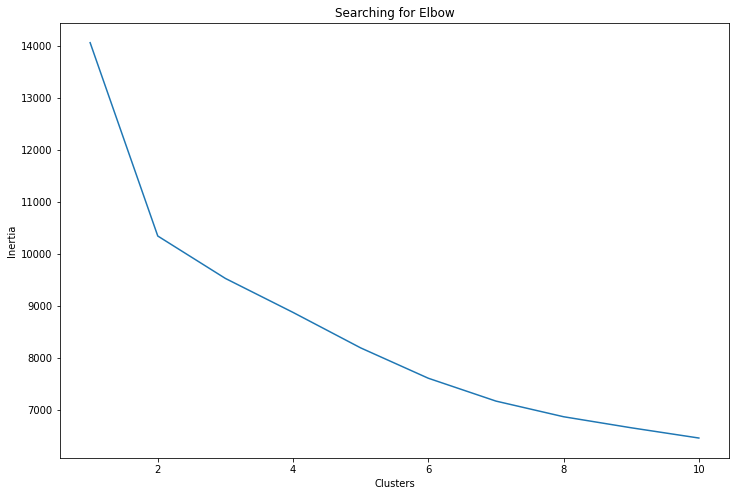

In [11]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(df_cluster_sc)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [74]:
# choose cluster as 5
km = KMeans(3).fit(df_cluster_sc)

In [75]:
df_cluster["kmeans"] = km.labels_

In [76]:
df_cluster

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0            0.432  0.0951    1   -23.511     1       0.0388      0.909000   
1            0.643  0.2800   10   -13.774     1       0.0332      0.965000   
2            0.322  0.1520    8   -16.765     1       0.0388      0.958000   
3            0.609  0.1620    3   -17.650     1       0.0375      0.917000   
4            0.509  0.1540    1   -18.927     1       0.0410      0.978000   
...            ...     ...  ...       ...   ...          ...           ...   
1077         0.805  0.9090    0    -6.539     0       0.0505      0.006570   
1078         0.665  0.5350    9   -15.905     0       0.0718      0.717000   
1079         0.791  0.6530   11    -7.117     0       0.0316      0.107000   
1080         0.879  0.3250    9   -12.705     0       0.1380      0.000304   
1081         0.703  0.8380    2   -13.117     1       0.0406      0.044900   

      instrumentalness  liveness  valence    tempo  duration_ms  \
0             0.890000    0.1170   0.0930  100.265       373840   
1             0.867000    0.1070   0.0865  108.046       203097   
2             0.899000    0.1270   0.2030  177.730       207206   
3             0.791000    0.1120   0.1230  106.051       237679   
4             0.936000    0.1150   0.2410  121.049       197273   
...                ...       ...      ...      ...          ...   
1077          0.926000    0.0674   0.6350  122.004       536046   
1078          0.911000    0.0978   0.1740  119.999       328000   
1079          0.000061    0.1060   0.5550  123.992       219000   
1080          0.923000    0.0877   0.7660  123.023       359794   
1081          0.923000    0.1050   0.0939  120.007       364227   

      time_signature  kmeans  agg_labels  dbscan_labels  
0                  4       2           0              0  
1                  4       2           0              0  
2                  3       2           0              0  
3                  4       2           0              0  
4                  4       2           0              0  
...              ...     ...         ...            ...  
1077               4       0           0              0  
1078               4       2           0              0  
1079               4       0           0              0  
1080               4       0           0              0  
1081               4       1           0              0  

[1082 rows x 16 columns]

In [77]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_cluster_sc)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

In [78]:
principalDf.head()

pc1       pc2
0  4.339422 -0.340374
1  2.445950 -0.951897
2  3.687218  1.413591
3  3.007054 -0.034365
4  3.308531  0.585870

In [79]:
df.shape

(1082, 14)

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

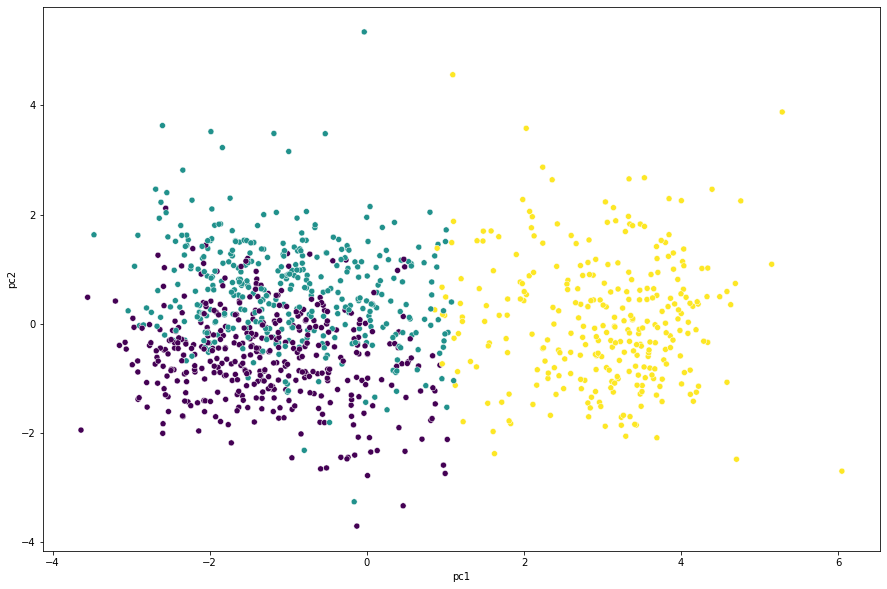

In [80]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=principalDf["pc1"], y = principalDf["pc2"], c=df_cluster["kmeans"])

# Agglorative Clustering

In [81]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=3, linkage='average').fit(df_cluster_sc)

df_cluster['agg_labels'] = agglom.labels_


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

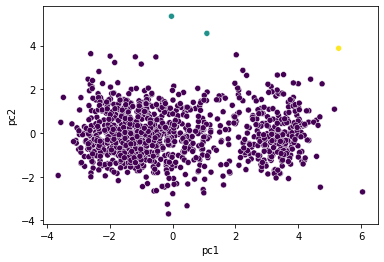

In [82]:
sns.scatterplot(x=principalDf["pc1"], y = principalDf["pc2"], c=df_cluster["agg_labels"])

# DBScan

In [83]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=11, min_samples=10).fit(df_cluster_sc)

df_cluster['dbscan_labels'] = db.labels_


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

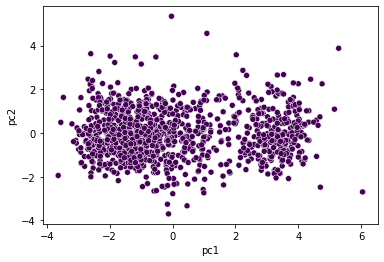

In [84]:
sns.scatterplot(x=principalDf["pc1"], y = principalDf["pc2"], c=df_cluster["dbscan_labels"])

# Song Recommendation

In [23]:
df

Unnamed: 0                artist                          track  \
0              0     Bill Charlap Trio                      Day Dream   
1              1             Hara Noda  The Beauty of Everyday Things   
2              2           Jaden Berry                      Bewitched   
3              3       Wildflower Trio                       The Wind   
4              4  Courtney Salas Group            Constantly Changing   
...          ...                   ...                            ...   
1077          95             Tim Green                          Embre   
1078          96            Phil Anker                       Magnetic   
1079          97           Denton (UK)                   Depend On Me   
1080          98             Rick Wade                 Deep -N- Dirty   
1081          99                 Nuage                         Of Sea   

      danceability  energy  key  loudness  mode  speechiness  acousticness  \
0            0.432  0.0951    1   -23.511     1       0.0388      0.909000   
1            0.643  0.2800   10   -13.774     1       0.0332      0.965000   
2            0.322  0.1520    8   -16.765     1       0.0388      0.958000   
3            0.609  0.1620    3   -17.650     1       0.0375      0.917000   
4            0.509  0.1540    1   -18.927     1       0.0410      0.978000   
...            ...     ...  ...       ...   ...          ...           ...   
1077         0.805  0.9090    0    -6.539     0       0.0505      0.006570   
1078         0.665  0.5350    9   -15.905     0       0.0718      0.717000   
1079         0.791  0.6530   11    -7.117     0       0.0316      0.107000   
1080         0.879  0.3250    9   -12.705     0       0.1380      0.000304   
1081         0.703  0.8380    2   -13.117     1       0.0406      0.044900   

      ...  valence    tempo            type                      id  \
0     ...   0.0930  100.265  audio_features  5Smmg9SpxnawbuYPKSNcmx   
1     ...   0.0865  108.046  audio_features  3jiTehDiPwfIxr9MHfPUvb   
2     ...   0.2030  177.730  audio_features  7va480wmDj33F0PRpINgkD   
3     ...   0.1230  106.051  audio_features  3ssyhOkzW2tfNCiR7qihx4   
4     ...   0.2410  121.049  audio_features  51mO5KysnUohGZS49sH3OM   
...   ...      ...      ...             ...                     ...   
1077  ...   0.6350  122.004  audio_features  3wbUuzRdemeNJuqnMNBC9m   
1078  ...   0.1740  119.999  audio_features  4avYediY0ck6jMfRK5LK6r   
1079  ...   0.5550  123.992  audio_features  4yQRctOSENVDuXtLLndkbH   
1080  ...   0.7660  123.023  audio_features  1ARiXnXFgvydd61r4ODC75   
1081  ...   0.0939  120.007  audio_features  3cGYeXxZTPqmxaZ27JUJsD   

                                       uri  \
0     spotify:track:5Smmg9SpxnawbuYPKSNcmx   
1     spotify:track:3jiTehDiPwfIxr9MHfPUvb   
2     spotify:track:7va480wmDj33F0PRpINgkD   
3     spotify:track:3ssyhOkzW2tfNCiR7qihx4   
4     spotify:track:51mO5KysnUohGZS49sH3OM   
...                                    ...   
1077  spotify:track:3wbUuzRdemeNJuqnMNBC9m   
1078  spotify:track:4avYediY0ck6jMfRK5LK6r   
1079  spotify:track:4yQRctOSENVDuXtLLndkbH   
1080  spotify:track:1ARiXnXFgvydd61r4ODC75   
1081  spotify:track:3cGYeXxZTPqmxaZ27JUJsD   

                                             track_href  \
0     https://api.spotify.com/v1/tracks/5Smmg9Spxnaw...   
1     https://api.spotify.com/v1/tracks/3jiTehDiPwfI...   
2     https://api.spotify.com/v1/tracks/7va480wmDj33...   
3     https://api.spotify.com/v1/tracks/3ssyhOkzW2tf...   
4     https://api.spotify.com/v1/tracks/51mO5KysnUoh...   
...                                                 ...   
1077  https://api.spotify.com/v1/tracks/3wbUuzRdemeN...   
1078  https://api.spotify.com/v1/tracks/4avYediY0ck6...   
1079  https://api.spotify.com/v1/tracks/4yQRctOSENVD...   
1080  https://api.spotify.com/v1/tracks/1ARiXnXFgvyd...   
1081  https://api.spotify.com/v1/tracks/3cGYeXxZTPqm...   

                                           analysis_url duration_ms  \
0     

# Testing on example song to find closest songs

In [32]:
song = "The Wind"

In [33]:
df_cluster

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0            0.432  0.0951    1   -23.511     1       0.0388      0.909000   
1            0.643  0.2800   10   -13.774     1       0.0332      0.965000   
2            0.322  0.1520    8   -16.765     1       0.0388      0.958000   
3            0.609  0.1620    3   -17.650     1       0.0375      0.917000   
4            0.509  0.1540    1   -18.927     1       0.0410      0.978000   
...            ...     ...  ...       ...   ...          ...           ...   
1077         0.805  0.9090    0    -6.539     0       0.0505      0.006570   
1078         0.665  0.5350    9   -15.905     0       0.0718      0.717000   
1079         0.791  0.6530   11    -7.117     0       0.0316      0.107000   
1080         0.879  0.3250    9   -12.705     0       0.1380      0.000304   
1081         0.703  0.8380    2   -13.117     1       0.0406      0.044900   

      instrumentalness  liveness  valence    tempo  duration_ms  \
0             0.890000    0.1170   0.0930  100.265       373840   
1             0.867000    0.1070   0.0865  108.046       203097   
2             0.899000    0.1270   0.2030  177.730       207206   
3             0.791000    0.1120   0.1230  106.051       237679   
4             0.936000    0.1150   0.2410  121.049       197273   
...                ...       ...      ...      ...          ...   
1077          0.926000    0.0674   0.6350  122.004       536046   
1078          0.911000    0.0978   0.1740  119.999       328000   
1079          0.000061    0.1060   0.5550  123.992       219000   
1080          0.923000    0.0877   0.7660  123.023       359794   
1081          0.923000    0.1050   0.0939  120.007       364227   

      time_signature  kmeans  agg_labels  dbscan_labels  
0                  4       1           0              0  
1                  4       1           0              0  
2                  3       3           0              0  
3                  4       1           0              0  
4                  4       1           0              0  
...              ...     ...         ...            ...  
1077               4       2           0              0  
1078               4       2           0              0  
1079               4       5           0              0  
1080               4       2           0              0  
1081               4       2           0              0  

[1082 rows x 16 columns]

In [34]:
df["kmeans_label"] = df_cluster["kmeans"] # add this line

In [35]:
df.head()

Unnamed: 0                artist                          track  \
0           0     Bill Charlap Trio                      Day Dream   
1           1             Hara Noda  The Beauty of Everyday Things   
2           2           Jaden Berry                      Bewitched   
3           3       Wildflower Trio                       The Wind   
4           4  Courtney Salas Group            Constantly Changing   

   danceability  energy  key  loudness  mode  speechiness  acousticness  ...  \
0         0.432  0.0951    1   -23.511     1       0.0388         0.909  ...   
1         0.643  0.2800   10   -13.774     1       0.0332         0.965  ...   
2         0.322  0.1520    8   -16.765     1       0.0388         0.958  ...   
3         0.609  0.1620    3   -17.650     1       0.0375         0.917  ...   
4         0.509  0.1540    1   -18.927     1       0.0410         0.978  ...   

     tempo            type                      id  \
0  100.265  audio_features  5Smmg9SpxnawbuYPKSNcmx   
1  108.046  audio_features  3jiTehDiPwfIxr9MHfPUvb   
2  177.730  audio_features  7va480wmDj33F0PRpINgkD   
3  106.051  audio_features  3ssyhOkzW2tfNCiR7qihx4   
4  121.049  audio_features  51mO5KysnUohGZS49sH3OM   

                                    uri  \
0  spotify:track:5Smmg9SpxnawbuYPKSNcmx   
1  spotify:track:3jiTehDiPwfIxr9MHfPUvb   
2  spotify:track:7va480wmDj33F0PRpINgkD   
3  spotify:track:3ssyhOkzW2tfNCiR7qihx4   
4  spotify:track:51mO5KysnUohGZS49sH3OM   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/5Smmg9Spxnaw...   
1  https://api.spotify.com/v1/tracks/3jiTehDiPwfI...   
2  https://api.spotify.com/v1/tracks/7va480wmDj33...   
3  https://api.spotify.com/v1/tracks/3ssyhOkzW2tf...   
4  https://api.spotify.com/v1/tracks/51mO5KysnUoh...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/5Smm...      373840   
1  https://api.spotify.com/v1/audio-analysis/3jiT...      203097   
2  https://api.spotify.com/v1/audio-analysis/7va4...      207206   
3  https://api.spotify.com/v1/audio-analysis/3ssy...      237679   
4  https://api.spotify.com/v1/audio-analysis/51mO...      197273   

  time_signature playlist  kmeans_label  
0              4     Jazz             1  
1              4     Jazz             1  
2              3     Jazz             3  
3              4     Jazz             1  
4              4     Jazz             1  

[5 rows x 23 columns]

In [36]:
df[df["track"]==song]["kmeans_label"]

3    1
Name: kmeans_label, dtype: int32

In [38]:
cluster_num = df[df["track"]==song]["kmeans_label"].values[0]
cluster_num

1

In [39]:
df[df["kmeans_label"]==cluster_num]["track"].values

array(['Day Dream', 'The Beauty of Everyday Things', 'The Wind',
       'Constantly Changing', 'Solitude', "Don't Go To Strangers",
       'Counting Stars', 'These Foolish Things', 'When I Fell for You',
       'A Life Remembered', 'Sails', 'Akaishi',
       'Honey, You Are My Everything', 'Nuages \u200b\u200bCreux',
       'A Quiet Place', 'Look For The Silver Lining',
       'Clear as Autumn Nights', "I've Never Been in Love Before",
       'A Few Days Ahead', 'Ruby, My Dear', 'In Another Universe',
       'Autumn Serenade', 'I Loves You, Porgy', 'Confidant',
       "Don't Open Your Eyes", 'Prelude to a Kiss', 'Spring Came Early',
       "I'm in the Mood for Love", 'Dreamsville', 'Our Best Year Yet',
       'Momentum', 'Misty', "The Party's Over", 'Midnight Lines',
       'Cry Me a River', 'Nothing Lasts Forever', 'Sun Souls', 'At Last',
       'Old Person Eyes', 'Black Monday', 'The More I See You',
       'Close Your Eyes', 'I Thought About You', 'La Libertad',
       'It Never Rai

# Classification Model

In [40]:
df.head()

Unnamed: 0                artist                          track  \
0           0     Bill Charlap Trio                      Day Dream   
1           1             Hara Noda  The Beauty of Everyday Things   
2           2           Jaden Berry                      Bewitched   
3           3       Wildflower Trio                       The Wind   
4           4  Courtney Salas Group            Constantly Changing   

   danceability  energy  key  loudness  mode  speechiness  acousticness  ...  \
0         0.432  0.0951    1   -23.511     1       0.0388         0.909  ...   
1         0.643  0.2800   10   -13.774     1       0.0332         0.965  ...   
2         0.322  0.1520    8   -16.765     1       0.0388         0.958  ...   
3         0.609  0.1620    3   -17.650     1       0.0375         0.917  ...   
4         0.509  0.1540    1   -18.927     1       0.0410         0.978  ...   

     tempo            type                      id  \
0  100.265  audio_features  5Smmg9SpxnawbuYPKSNcmx   
1  108.046  audio_features  3jiTehDiPwfIxr9MHfPUvb   
2  177.730  audio_features  7va480wmDj33F0PRpINgkD   
3  106.051  audio_features  3ssyhOkzW2tfNCiR7qihx4   
4  121.049  audio_features  51mO5KysnUohGZS49sH3OM   

                                    uri  \
0  spotify:track:5Smmg9SpxnawbuYPKSNcmx   
1  spotify:track:3jiTehDiPwfIxr9MHfPUvb   
2  spotify:track:7va480wmDj33F0PRpINgkD   
3  spotify:track:3ssyhOkzW2tfNCiR7qihx4   
4  spotify:track:51mO5KysnUohGZS49sH3OM   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/5Smmg9Spxnaw...   
1  https://api.spotify.com/v1/tracks/3jiTehDiPwfI...   
2  https://api.spotify.com/v1/tracks/7va480wmDj33...   
3  https://api.spotify.com/v1/tracks/3ssyhOkzW2tf...   
4  https://api.spotify.com/v1/tracks/51mO5KysnUoh...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/5Smm...      373840   
1  https://api.spotify.com/v1/audio-analysis/3jiT...      203097   
2  https://api.spotify.com/v1/audio-analysis/7va4...      207206   
3  https://api.spotify.com/v1/audio-analysis/3ssy...      237679   
4  https://api.spotify.com/v1/audio-analysis/51mO...      197273   

  time_signature playlist  kmeans_label  
0              4     Jazz             1  
1              4     Jazz             1  
2              3     Jazz             3  
3              4     Jazz             1  
4              4     Jazz             1  

[5 rows x 23 columns]

In [41]:
df.columns

Index(['Unnamed: 0', 'artist', 'track', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature', 'playlist',
       'kmeans_label'],
      dtype='object')

In [42]:
input_features = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature"]

In [44]:
output_features = "playlist"

In [45]:
df.isna().sum()

Unnamed: 0          0
artist              0
track               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
playlist            0
kmeans_label        0
dtype: int64

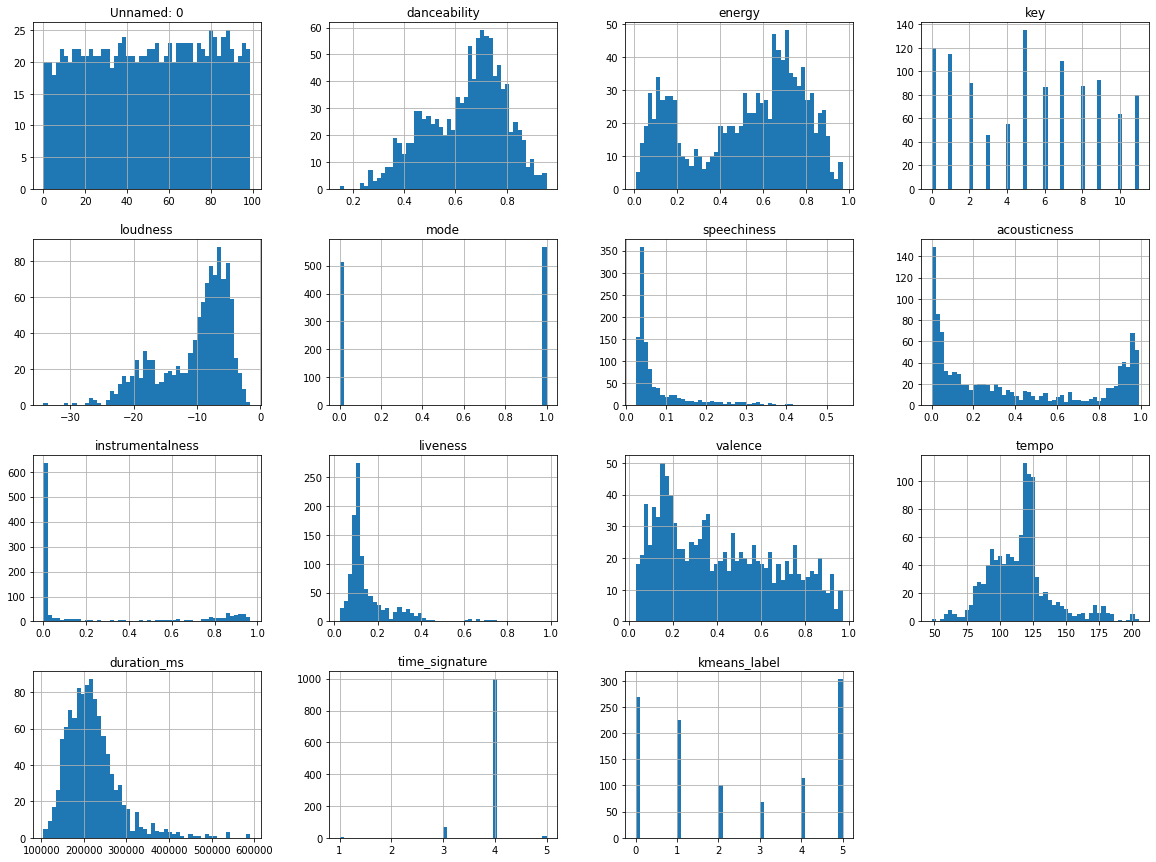

In [46]:
# plot histogram of the data
df.hist(bins=50, figsize=(20, 15));


In [47]:
df.columns

Index(['Unnamed: 0', 'artist', 'track', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature', 'playlist',
       'kmeans_label'],
      dtype='object')

In [49]:
op = df["playlist"].value_counts()

Text(0.5, 1.0, 'Label counts Pie Chart')

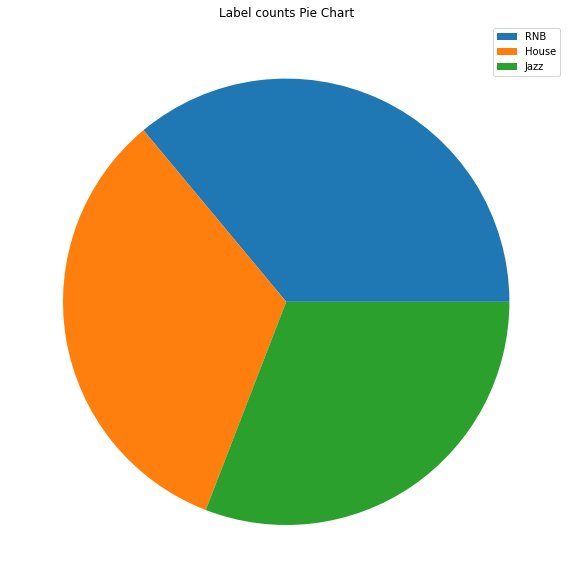

In [50]:
plt.figure(figsize=(10,15))
patches, texts = plt.pie(op);
plt.legend(patches, op.index, loc="best",)
plt.title("Label counts Pie Chart")

In [51]:
df.columns

Index(['Unnamed: 0', 'artist', 'track', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature', 'playlist',
       'kmeans_label'],
      dtype='object')

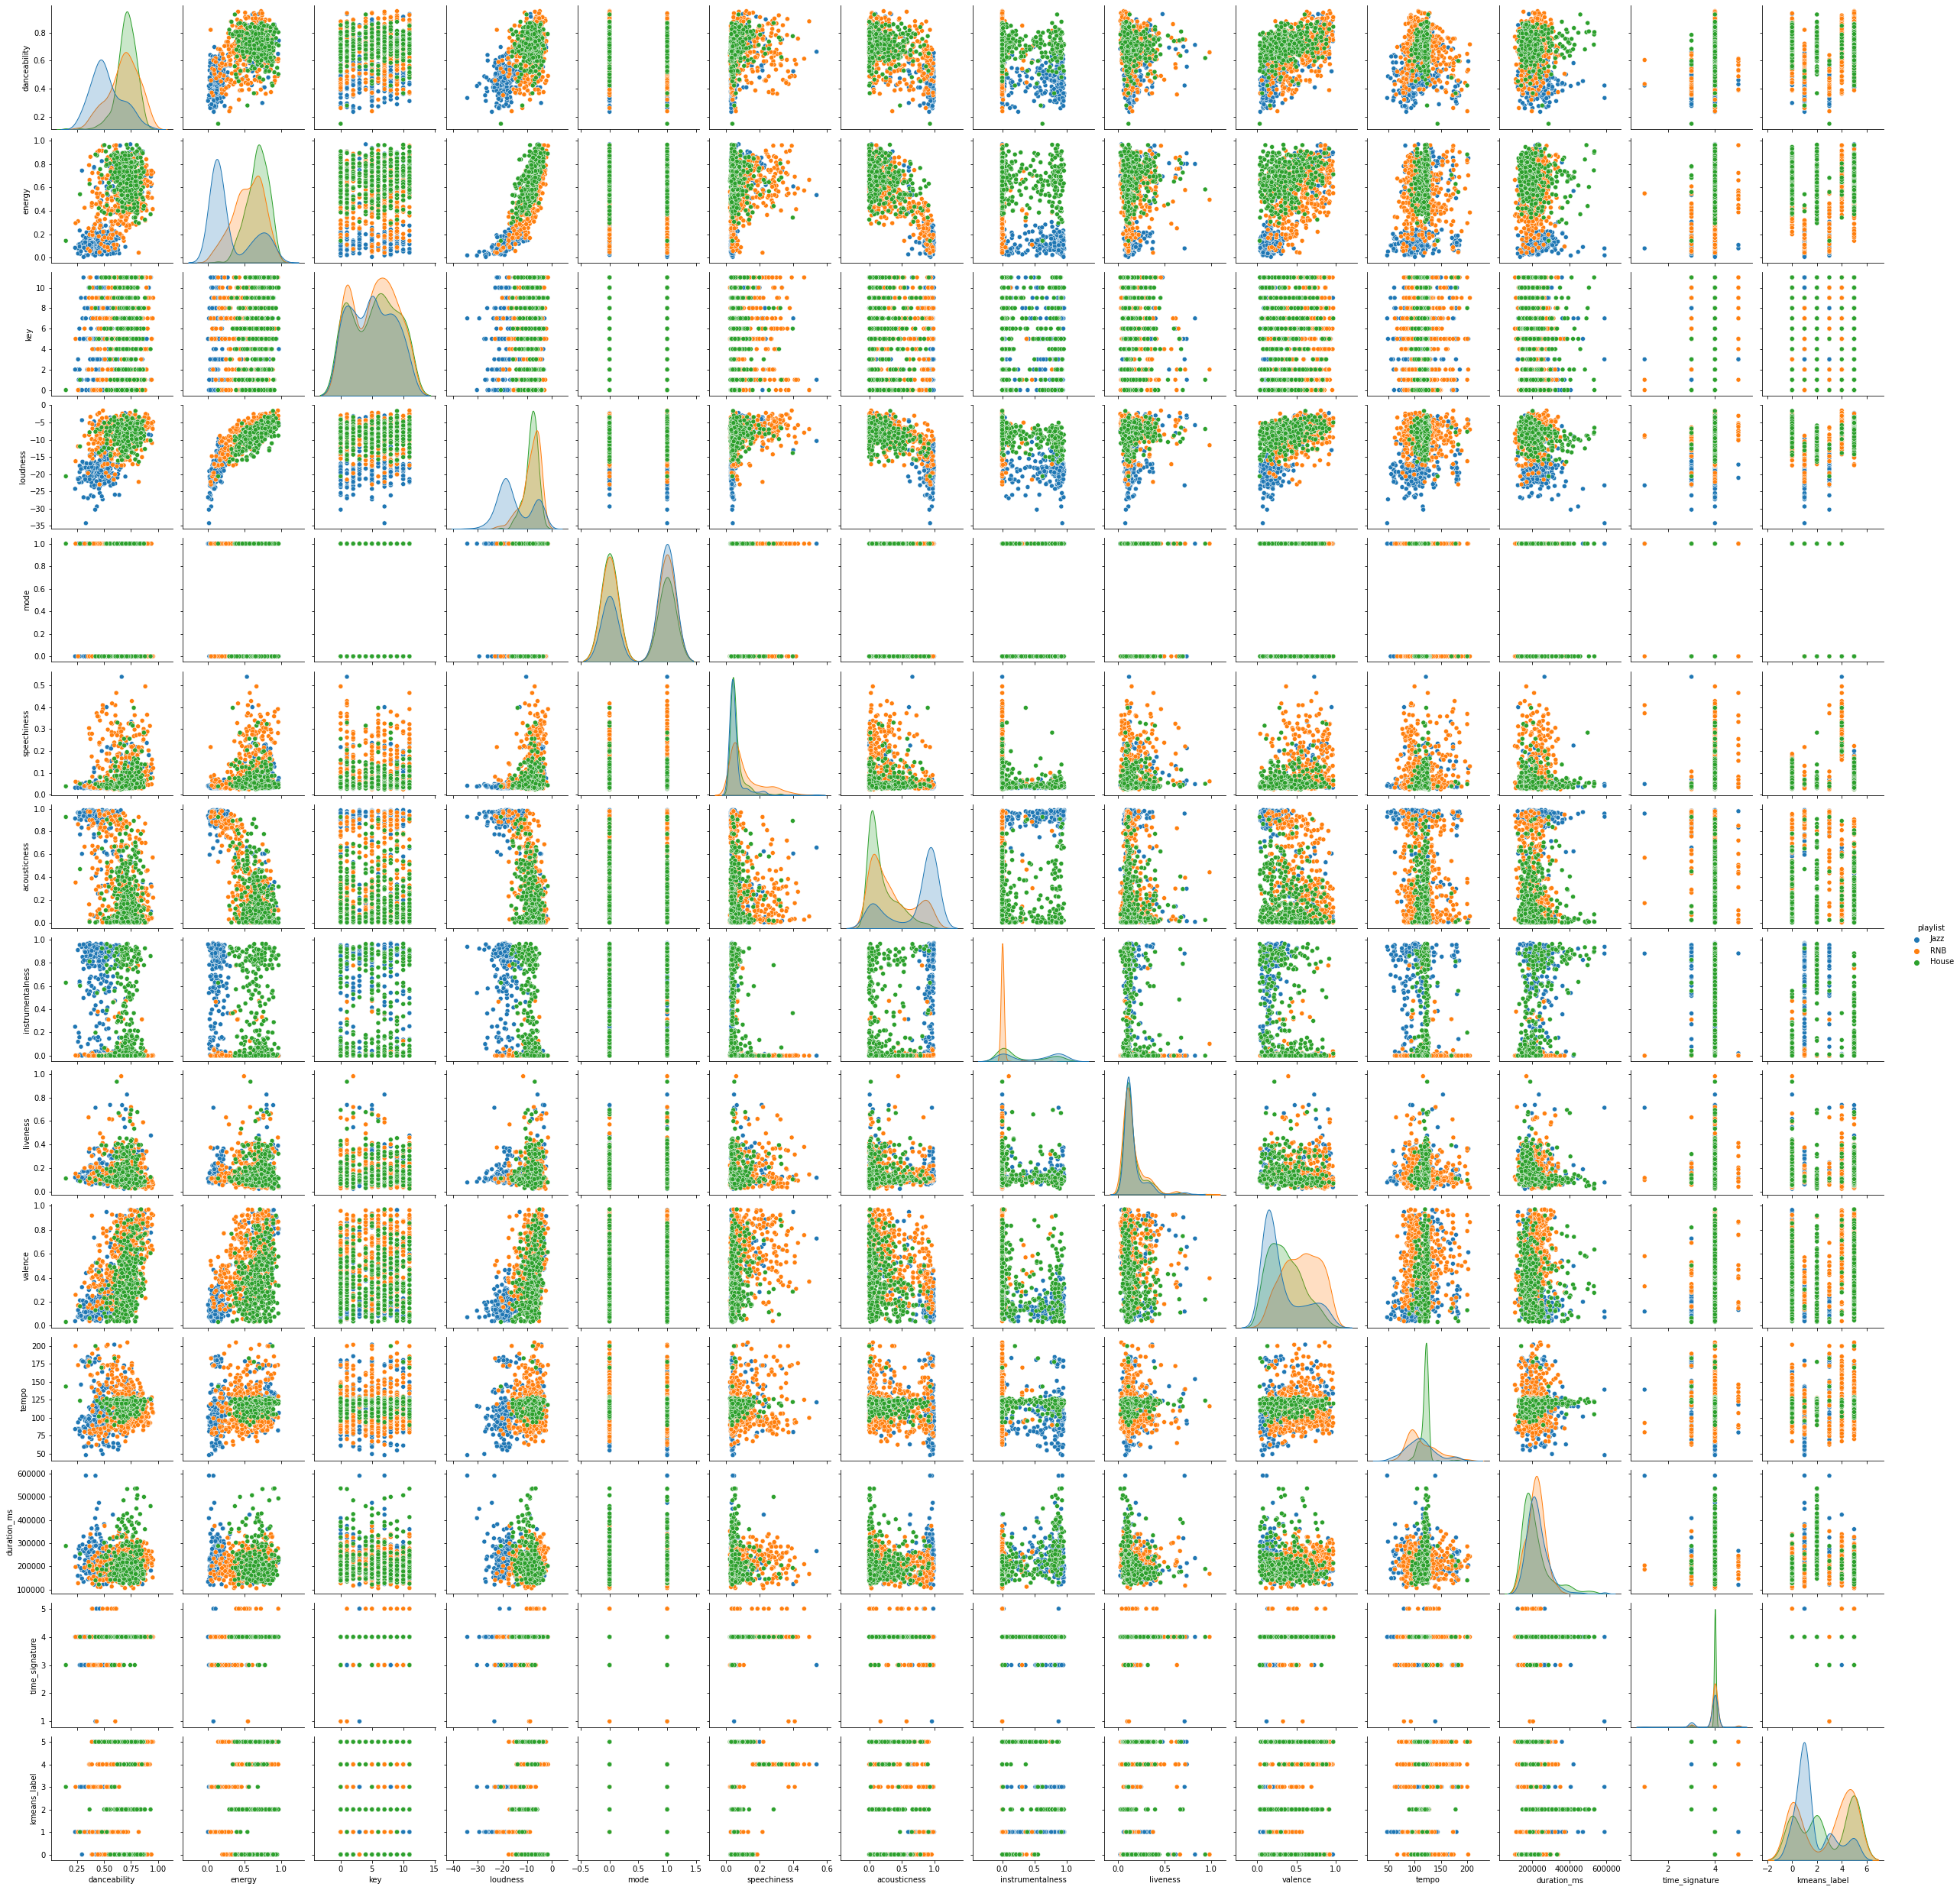

In [52]:
sns.pairplot(df.drop(["Unnamed: 0"],axis=1), hue="playlist")

# Model

In [53]:
df = df.loc[:, input_features + ["playlist"]].copy()

In [54]:
cat_column = df.select_dtypes(include=['object']).columns

In [55]:
cat_column = cat_column.drop(['playlist'])

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('playlist', axis=1), df['playlist'], test_size=0.2, random_state=42)

In [59]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [61]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)


KNeighborsClassifier()

In [62]:
y_pred = model.predict(X_test)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [64]:
accuracy_score(y_test, y_pred)

0.8110599078341014

In [65]:
confusion_matrix(y_test, y_pred)

array([[60,  1,  3],
       [11, 51,  7],
       [16,  3, 65]])

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       House       0.69      0.94      0.79        64
        Jazz       0.93      0.74      0.82        69
         RNB       0.87      0.77      0.82        84

    accuracy                           0.81       217
   macro avg       0.83      0.82      0.81       217
weighted avg       0.83      0.81      0.81       217



# Random Forest

In [67]:
model = RandomForestClassifier(n_estimators=40, max_depth=5 , random_state=42)

In [68]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=40, random_state=42)

In [69]:
y_pred = model.predict(X_test)

In [70]:
accuracy_score(y_test, y_pred)

0.8387096774193549

In [71]:
confusion_matrix(y_test, y_pred)

array([[61,  0,  3],
       [ 4, 45, 20],
       [ 6,  2, 76]])

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       House       0.86      0.95      0.90        64
        Jazz       0.96      0.65      0.78        69
         RNB       0.77      0.90      0.83        84

    accuracy                           0.84       217
   macro avg       0.86      0.84      0.84       217
weighted avg       0.85      0.84      0.83       217



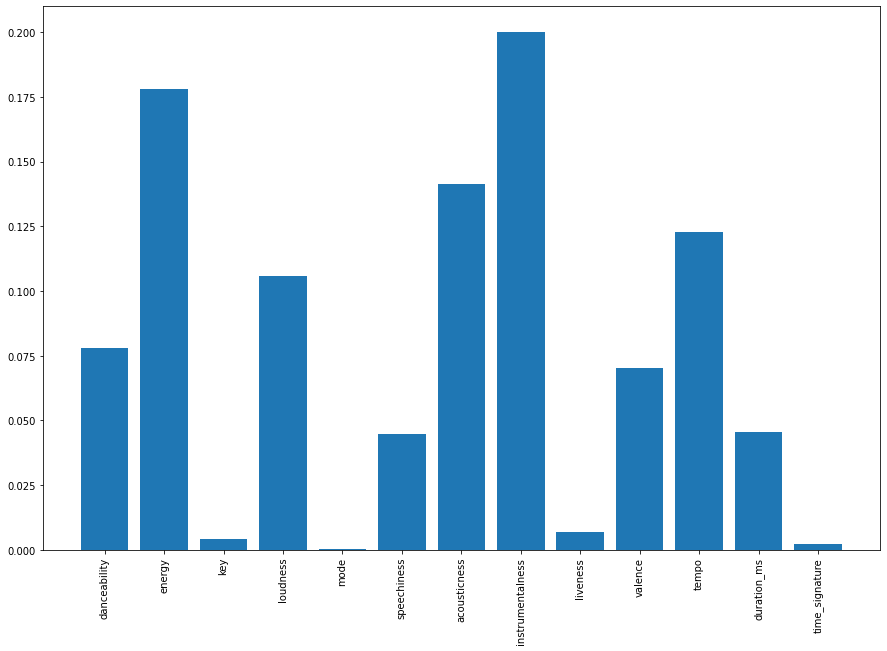

In [73]:
# feature importances
plt.figure(figsize=(15,10))
plt.bar(df.drop('playlist', axis=1).columns,model.feature_importances_)
plt.xticks(rotation=90);